## Semi-Supervised Clustering with Constraints

In [7]:
import os
import sys
import glob
import numpy as np
import pandas as pd


# PACKAGE_FOLDER =  os.environ.get('PACKAGE_FOLDER')
# sys.path.insert(0, PACKAGE_FOLDER)

In [8]:
# Install latest raptor_functions library and import modules

from raptor_functions.supervised.datasets import get_data
from raptor_functions.supervised.feature_extraction import *
from raptor_functions.semi_supervised.ss_clustering import *
from raptor_functions.semi_supervised.train import *

In [9]:
# Load data
lab_data =  get_data('lab_data')

In [10]:
lab_data.head()

,exp_unique_id,exp_name,timesteps,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,humidity,measurement_stage,date_exp,time_elapsed,datetime_exp,filename,result
0,0,72H 2 Control,0.0,315.042,310.101,304.156,302.366,258.152,303.153,304.705,313.252,297.018,299.477,303.679,308.549,105.195,109.778,115.102,116.606,161.035,116.248,114.840,105.887,122.073,119.113,114.816,110.710,29.276,baseline,13/07/2021,0.00,2021-07-13 14:36:50.000,72H 2 Control_14_36_11.28.txt,Control
1,0,72H 2 Control,1.0,314.780,309.695,304.084,302.318,257.627,302.939,304.681,313.156,297.710,300.289,304.323,308.597,105.004,109.778,115.150,116.606,160.963,116.057,114.744,105.839,122.121,119.161,114.816,110.686,40.330,baseline,13/07/2021,0.25,2021-07-13 14:36:50.250,72H 2 Control_14_36_11.28.txt,Control
2,0,72H 2 Control,2.0,315.042,310.029,304.968,303.010,258.415,303.321,304.705,312.965,297.137,299.978,304.156,308.191,105.243,109.969,115.078,116.415,161.035,116.057,114.720,106.054,122.049,119.041,114.792,110.781,51.610,baseline,13/07/2021,0.50,2021-07-13 14:36:50.500,72H 2 Control_14_36_11.28.txt,Control
3,0,72H 2 Control,3.0,314.422,310.005,304.228,302.843,258.486,303.297,304.872,313.133,297.161,300.074,304.204,308.358,105.195,109.969,115.150,116.535,160.987,115.962,114.625,106.030,122.169,119.089,114.792,110.662,47.188,baseline,13/07/2021,0.75,2021-07-13 14:36:50.750,72H 2 Control_14_36_11.28.txt,Control
4,0,72H 2 Control,4.0,314.875,310.029,304.466,302.795,258.438,303.703,304.968,313.085,297.137,300.360,304.252,308.477,105.028,109.731,115.078,116.511,161.035,115.986,114.601,105.959,121.954,118.874,114.744,110.829,33.652,baseline,13/07/2021,1.00,2021-07-13 14:36:51.000,72H 2 Control_14_36_11.28.txt,Control


In [13]:
# Extract and select training features 
# Takes a while.........

df = get_training_features(lab_data)


Extracting all features


Feature Extraction: 100%|██████████| 10/10 [01:12<00:00,  7.24s/it]


Selecting relevant features
[16:24:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'

KeyboardInterrupt: 

In [7]:
# This is to simulate a situation of labeled and unlabeled data
# We are replacing the label of 30% of the data with -1
# unlabeled data will have label of -1
df_ul = replace_sample(df, 'result', 0.6, -1)
df_ul.head(10)

,sensor_18__mean_abs_change,result
0,0.891033,Control
1,0.882908,-1
2,0.888700,Control
3,0.890117,-1
4,0.884100,-1
5,0.925108,-1
6,0.908558,-1
7,0.896642,-1
8,0.911358,Covid
9,0.936642,-1


In [8]:
train_experiments(df_ul)

[I 2022-06-20 12:25:47,813] A new study created in memory with name: Constrained Clustering
2022/06/20 12:25:47 INFO mlflow.tracking.fluent: Experiment with name 'Constrained Clustering' does not exist. Creating a new experiment.
[W 2022-06-20 12:25:49,260] Trial 0 failed, because the value None could not be cast to float.
2022/06/20 12:25:49 INFO mlflow.tracking.fluent: Experiment with name 'Constrained Clustering' does not exist. Creating a new experiment.
[W 2022-06-20 12:25:49,747] Trial 1 failed, because the value None could not be cast to float.
[W 2022-06-20 12:25:50,210] Trial 2 failed, because the value None could not be cast to float.
[W 2022-06-20 12:25:50,518] Trial 3 failed, because the value None could not be cast to float.
[W 2022-06-20 12:25:50,769] Trial 4 failed, because the value None could not be cast to float.


Click on this link to track experiments:  http://ec2-3-10-175-206.eu-west-2.compute.amazonaws.com:5000/


In [63]:
df_ul['sen'] = df['sensor_18__mean_abs_change'].sample(frac=1)

In [ ]:
# This is a 3 stage process:

# 1. We get our constraints - must_link and cannot_link
# 2. We use our constraints and unsupervised ML - KMeans to get clusters
# 3. We map our clusters to actual labels
# 4. Assign each data point to cluster/label

df_cluster, centroids = get_cluster_labels(df_ul)

In [135]:



X = df_cluster[['sensor_18__mean_abs_change', 'sen']]
x = df_cluster['sensor_18__mean_abs_change']

df_X = X.join(df['result'])
df_x = pd.concat([x, df['result']], axis = 1)

df_ul_X = replace_sample(df_X, 'result', 0.6, -1)
df_ul_x = replace_sample(df_x, 'result', 0.6, -1)



In [136]:
df_cluster_X, centroids_X = get_cluster_labels(df_ul_X)
df_cluster_x, centroids_x = get_cluster_labels(df_ul_x)

In [459]:
x.iloc[0]

0.8910333333333335

In [486]:
x.values.shape

(54,)

In [484]:
X.iloc[0].values.shape

(2,)

In [487]:
def ss_predictions(prediction_data, centroids, mode='single'):
    # print('type: ', type(prediction_data))

    if (isinstance(prediction_data, pd.Series)) and mode=='multi':
        preds = prediction_data.apply(ss_prediction, centroids=centroids)
        return preds

    if (isinstance(prediction_data, pd.DataFrame)):
        preds = []
        for i in prediction_data.values:
        # print()
            pred = ss_prediction(i, centroids)
            preds.append(pred)
        return preds
    if prediction_data.ndim == 0:
        pred = ss_prediction(prediction_data, centroids)
        return pred
    if prediction_data.ndim == 1:
        pred = ss_prediction(prediction_data, centroids)
        return pred

    # print(prediction_data)
    # return preds

In [488]:
def ss_prediction(prediction_data, centroids):

    prediction_data = np.array(prediction_data)

    # print('Type: ', type(prediction_data))

    # print('N Shape: ', prediction_data.shape)
    # print('N Dimensions: ', prediction_data.ndim)

    # if prediction_data.ndim == 1:
    
    if prediction_data.ndim == 0:

        dist_matrix = pd.DataFrame(cdist(np.array(prediction_data).reshape(-1,1), centroids))
        cluster = dist_matrix.idxmin(axis=1)
        # return 0
    
    if prediction_data.ndim == 1:
        dist_matrix = pd.DataFrame(cdist(np.array(prediction_data).reshape(1,-1), centroids))
        cluster = dist_matrix.idxmin(axis=1)
        # return 1

    # dist_matrix = pd.DataFrame(cdist(np.array(prediction_data), centroids))
    # cluster = dist_matrix.idxmin(axis=1)
    return cluster


    # return cluster

In [463]:
# ss_prediction(X.iloc[0], centroids_X)

In [464]:
# ss_prediction(x.iloc[0], centroids_x)

In [490]:
ss_predictions(x, centroids_x, mode='multi')

,0
0,1
1,1
2,1
3,1
4,1
5,0
6,0
7,0
8,0
9,0


In [491]:
ss_predictions(X, centroids_X)

[0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dt

In [492]:
ss_predictions(X, centroids_X)

[0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    1
 dt

In [494]:
ss_predictions(x, centroids_x, mode='multi')

,0
0,1
1,1
2,1
3,1
4,1
5,0
6,0
7,0
8,0
9,0


In [469]:
# X.shape, centroids_X

In [470]:
# x.shape, centroids_x

In [471]:
X.columns

Index(['sensor_18__mean_abs_change', 'sen'], dtype='object')

In [472]:
X.ndim, X.iloc[0].ndim

(2, 1)

In [473]:
x.ndim, x.iloc[0].ndim

(1, 0)

In [474]:
# x.columns

In [495]:
ss_predictions(X.iloc[0], centroids_X)

0    1
dtype: int64

In [479]:
X.iloc[0]

sensor_18__mean_abs_change    0.891033
sen                           0.891033
Name: 0, dtype: float64

In [496]:
ss_predictions(X.iloc[0], centroids_X)

0    1
dtype: int64

In [497]:
ss_predictions(x.iloc[0], centroids_x)

0    1
dtype: int64

In [ ]:
cluster_pred_X = ss_prediction(prediction_data_X, centroids)

In [ ]:
cluster_pred_x = ss_prediction(prediction_data_x, centroids)

In [128]:
import mlflow.pyfunc
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist


def ss_prediction(prediction_data, centroids):

    dist_matrix = pd.DataFrame(cdist(np.array(prediction_data).reshape(-1,1), centroids))
    cluster = dist_matrix.idxmin(axis=1)
    
    return cluster

# Define the model class
class SSC(mlflow.pyfunc.PythonModel):

    def __init__(self, centroids):
        self.centroids = centroids

    def predict(self, context, model_input):

        return ss_prediction(model_input, self.centroids)




In [79]:
# Construct the model
model_path = "ssc"
ssc = SSC(centroids)

In [81]:
# save the model
mlflow.pyfunc.save_model(path=model_path, python_model=ssc)

In [82]:

# Load the model in `python_function` format
loaded_model = mlflow.pyfunc.load_model(model_path)

In [ ]:
model_output = loaded_model.predict(X.iloc[9])


In [ ]:
ss_prediction()

In [55]:
model_output

0    0
dtype: int64

In [ ]:

# Evaluate the model
import pandas as pd
model_input = pd.DataFrame([range(10)])
model_output = loaded_model.predict(model_input)
assert model_output.equals(pd.DataFrame([range(5, 15)]))

In [10]:
# This is a 3 stage process:

# 1. We get our constraints - must_link and cannot_link
# 2. We use our constraints and unsupervised ML - KMeans to get clusters
# 3. We map our clusters to actual labels
# 4. Assign each data point to cluster/label

df_cluster, centroids = get_cluster_labels(df_ul)

In [58]:
# data with new labels



In [12]:
# Compare the unlabeled data to the new labels

df_combined = df_ul.join(df_cluster[['cluster', 'cluster_label']])
df_all = df_combined.join(df['result'], rsuffix='_actual')

In [13]:
sum(df_all['cluster_label'] == df_all['result_actual'])

49

In [14]:
df_all[df_all['cluster_label'] != df_all['result_actual'] ]

,sensor_18__mean_abs_change,result,cluster,cluster_label,result_actual
7,0.896642,-1,0,Covid,Control
20,0.895450,-1,0,Covid,Control
39,0.895842,Control,0,Covid,Control
45,0.896425,-1,0,Covid,Control
50,0.894858,-1,0,Covid,Control


In [15]:
df_all.tail()

,sensor_18__mean_abs_change,result,cluster,cluster_label,result_actual
49,0.920725,-1,0,Covid,Covid
50,0.894858,-1,0,Covid,Control
51,0.875758,-1,1,Control,Control
52,0.929242,Covid,0,Covid,Covid
53,0.884100,-1,1,Control,Control


In [ ]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist


dist_df = pd.DataFrame(distance_matrix(df_all['sensor_18__mean_abs_change'].values.reshape(-1,1), centroids))
cluster = dist_df.idxmin(axis=1)

In [106]:
X.iloc[0].values.reshape(1,-1)

array([[0.89103333, 0.89103333]])

In [109]:
distance_matrix(X.iloc[0].values.reshape(1,-1), centroids)

array([[0.04126972, 0.02027301]])

In [110]:
cdist(X.iloc[0].values.reshape(1,-1), centroids)

array([[0.04126972, 0.02027301]])

In [95]:
X.iloc[0].values.reshape(-1,1)

array([[0.89103333],
       [0.89103333]])

In [ ]:
from scipy.spatial import distance_matrix

dist_df = pd.DataFrame(distance_matrix(df_all['sensor_18__mean_abs_change'].values.reshape(-1,1), centroids))
cluster = dist_df.idxmin(axis=1)

In [83]:
control_cluster = df_all[df_all['cluster_label']=='Control']['sensor_12__minimum'].values
covid_cluster = df_all[df_all['cluster_label']=='Covid']['sensor_12__minimum'].values

In [112]:
centroids

[[247.86240740740737], [245.01803703703706]]

In [104]:
control = df_ul[df_ul['result']=='Control']['sensor_12__minimum'].values
covid = df_ul[df_ul['result']=='Covid']['sensor_12__minimum'].values
unknown = df_ul[df_ul['result']==-1]['sensor_12__minimum'].values

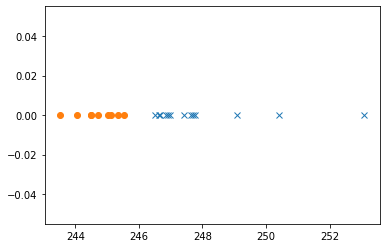

In [111]:
import numpy as np
import matplotlib.pyplot as plt
val = 0. # this is the value where you want the data to apltear on the y-axis.
ar = df_ul['sensor_12__minimum'].values 
plt.plot(control, np.zeros_like(control) + val, 'x')
plt.plot(covid, np.zeros_like(covid) + val, 'o');

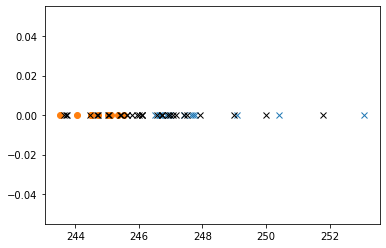

In [109]:
import numpy as np
import matplotlib.pyplot as plt
val = 0. # this is the value where you want the data to apltear on the y-axis.
ar = df_ul['sensor_12__minimum'].values 
plt.plot(control, np.zeros_like(control) + val, 'x')
plt.plot(covid, np.zeros_like(covid) + val, 'o')
plt.plot(unknown, np.zeros_like(unknown) + val, 'x', color='black')

# plt.plot(centroids[0], np.zeros_like(centroids[0]) + val, 'x', markersize=12, color='blue')
# plt.plot(centroids[1], np.zeros_like(centroids[1]) + val, 'o', markersize=12, color='orange')

plt.show()

In [ ]:
control_cluster = df_all[df_all['cluster_label']=='Control']['sensor_12__minimum'].values
covid_cluster = df_all[df_all['cluster_label']=='Covid']['sensor_12__minimum'].values

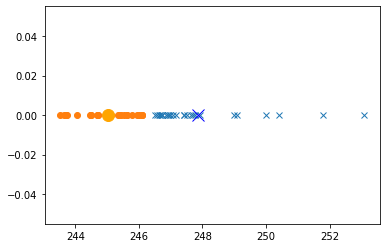

In [98]:
import numpy as np
import matplotlib.pyplot as plt
val = 0. # this is the value where you want the data to apltear on the y-axis.
ar = df_all['sensor_12__minimum'].values 
plt.plot(control_cluster, np.zeros_like(control_cluster) + val, 'x')
plt.plot(covid_cluster, np.zeros_like(covid_cluster) + val, 'o')
plt.plot(centroids[0], np.zeros_like(centroids[0]) + val, 'x', markersize=12, color='blue')
plt.plot(centroids[1], np.zeros_like(centroids[1]) + val, 'o', markersize=12, color='orange')

plt.show()

In [41]:
centroids[0]

[247.86240740740737]